In [1]:
from __future__ import print_function
%matplotlib inline

Structure of the lines is:
Line,Pada,Meter,MP1,MP2,MP3,MP4,MP5,MP6,MP7,MP8

In [2]:
hymns = {}
for line in open('dimeter-mp.csv', 'r'):
    comps = line.strip().split(',')
    line, pada, meter = comps[0:3]
    mps = comps[3:]
    hymn_id = '-'.join(line.split('.')[:2])
    if hymn_id not in hymns:
        hymns[hymn_id] = []
    hymns[hymn_id].append(mps)

How many hymns do we have in total?

In [3]:
print(len(hymns))

369


How are their lengths distributed?

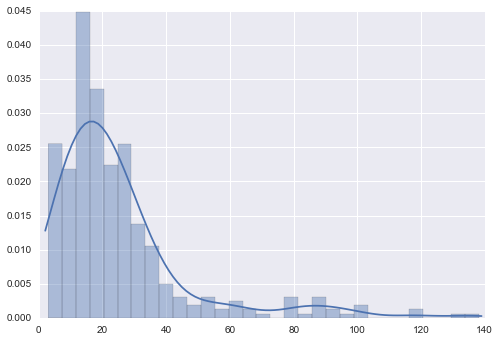

In [4]:
from seaborn.distributions import distplot
lens = [len(hymns[h]) for h in hymns]
distplot(lens)

Most seem to have around 25 lines, consisting of 8 MPs (metrical position).

Let us extract n-grams from the lines and find out what plain clustering does.

In [5]:
ids, texts = [], []
for h in hymns:
    # add book label:
    ids.append(h)
    # stringify mps:
    t = ''
    for line in hymns[h]:
        t += (''.join(line[:4])+'%'+''.join(line[4:])+'$')
    texts.append(t)

Let us turn this data into a corpus:

In [6]:
from pystyl.corpus import Corpus
corpus = Corpus(language='other')
corpus.add_texts(texts=texts,
                 titles=ids, #['b'+str(i) for i in range(len(texts))],
                 target_names=ids)

In [63]:
print(corpus)

<Corpus(369 texts)> 
Untokenized texts:

	- b0	(cat: 6):	'LLLH%LHLH$LHLH%LHLH$LHHH%LHLL$'[...]
	- b1	(cat: 6):	'HHHH%LHLL$LLHL%LHLL$HHHH%LHLL$'[...]
	- b2	(cat: 6):	'LLHH%LHLL$LHLH%LHLL$HLHH%LLLH$'[...]
	- b3	(cat: 6):	'HHLH%LHLL$LLHL%LHLH$LHLH%LHLH$'[...]
	- b4	(cat: 6):	'LHLH%LHLL$LHHL%LHLL$LHLH%LHLH$'[...]
	- b5	(cat: 6):	'HLHL%LHLH$HLHH%LHLH$LHLH%LHLL$'[...]
	- b6	(cat: 6):	'HHHL%LHLL$HHLH%LHLL$LHHL%LLLL$'[...]
	- b7	(cat: 6):	'HHHH%LHLH$LHHH%LHLH$HLHH%LHLH$'[...]
	- b8	(cat: 3):	'HHHH%LHLL$HHLH%LHLL$HLHH%LHLH$'[...]
	- b9	(cat: 3):	'LHHH%LHLH$HHLH%LHLL$LHHH%LHLH$'[...]
	- b10	(cat: 3):	'HHHH%LHLH$HLHL%LHLL$LHLH%LHLL$'[...]
	- b11	(cat: 10):	'HHHL%LHLL$HLHH%LHLH$LHLH%LHLL$'[...]
	- b12	(cat: 10):	'LLLL%LHLH$HHHL%LHLL$LHHH%HHLL$'[...]
	- b13	(cat: 4):	'LLHL%LHLL$HHHH%LHLL$LHHH%LHLL$'[...]
	- b14	(cat: 2):	'HHHH%LHLH$LHHH%LHLL$LHHH%LHLH$'[...]
	- b15	(cat: 7):	'LHHH%LHLL$HHHH%LHLL$LHHH%LHLH$'[...]
	- b16	(cat: 10):	'LHHL%LLLL$LHHH%LHLL$HHLL%HHLL$'[...]
	- b17	(cat: 2):	'LHHL%LHLH$HHH

In [7]:
mfi = corpus.vectorize(mfi=1000000,
                       ngram_type='char',
                       ngram_size=4,
                       vector_space='tf_std',
                       min_df=0.0)

In [8]:
print(len(mfi))

80


In [9]:
print(len(corpus))

369


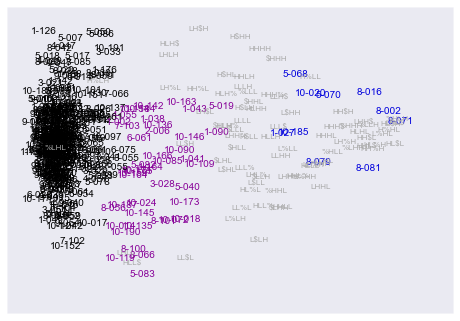

In [11]:
from pystyl.analysis import pca
pca_coor, pca_loadings = pca(corpus, nb_dimensions=2)
from pystyl.visualization import scatterplot
scatterplot(corpus, coor=pca_coor,
            nb_clusters=3, loadings=pca_loadings,
            save=True, outputfile="/Users/mike/Desktop/pca.pdf")

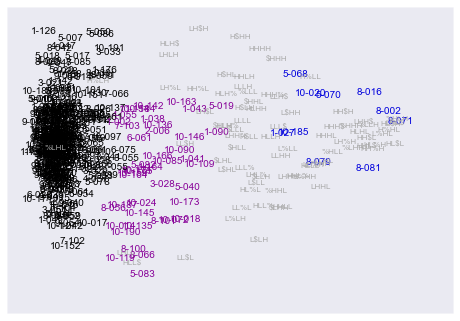

In [12]:
from pystyl.analysis import pca
pca_coor, pca_loadings = pca(corpus, nb_dimensions=2)
from pystyl.visualization import scatterplot
scatterplot(corpus, coor=pca_coor,
            nb_clusters=3, loadings=pca_loadings,
            save=True, outputfile="/Users/mike/Desktop/pca.pdf")

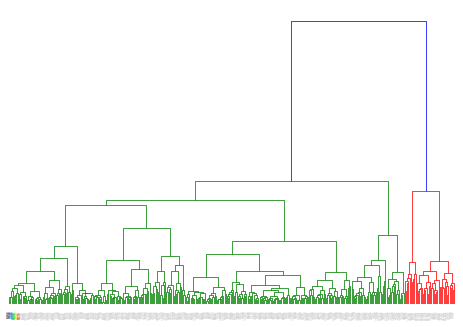

In [13]:
from pystyl.analysis import distance_matrix
dm = distance_matrix(corpus, 'minmax')
from pystyl.analysis import hierarchical_clustering
cluster_tree = hierarchical_clustering(dm, linkage='ward')
from pystyl.visualization import scipy_dendrogram
scipy_dendrogram(corpus=corpus, tree=cluster_tree,
                 outputfile='~/Desktop/scipy_dendrogram.pdf',
                 fontsize=3, save=True, return_svg=False)

In [14]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward',
                                     affinity='euclidean',
                                     n_clusters=2)
clustering.fit(corpus.vectorizer.X.toarray())
for title, label in zip(corpus.titles, clustering.labels_):
    if label == 1:
        print(title)

# add slice names:
#for x, y, name, cluster_label in zip(x1, x2, labels, clustering.labels_):

8-002
10-020
5-019
8-079
8-071
1-027
5-040
5-068
10-185
1-043
1-041
5-070
8-016
8-081
1-090
